=== 5 Baris Pertama ===


,Tanggal,Suhu,Curah_Hujan,Kelembaban,Angin,Awan
0,1970-01-01 00:00:00.631152000,25.82,NaN,86,1.36,98
1,1970-01-01 00:00:00.631155600,26.20,NaN,84,2.09,91
2,1970-01-01 00:00:00.631159200,26.45,NaN,84,2.44,94
3,1970-01-01 00:00:00.631162800,26.80,NaN,82,2.29,94
4,1970-01-01 00:00:00.631166400,27.04,NaN,82,1.71,76



=== Statistik Dasar (Numerik) ===


,count,mean,std,min,25%,50%,75%,max
Suhu,264924.0,27.273336,1.962571,3.00,25.94,27.0,28.60,39.0
Kelembaban,264924.0,80.844997,8.720109,14.00,74.00,83.0,88.00,100.0
Curah_Hujan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angin,264924.0,3.612394,1.909580,0.01,2.10,3.6,4.71,31.9



=== Statistik Dasar (Kategorikal) ===


,count,prop
Awan,,
20,121508,0.459
40,66332,0.250
75,23799,0.090
100,7373,0.028
99,2999,0.011
...,...,...
3,267,0.001
62,266,0.001
70,262,0.001



=== Missing Values ===


,Missing_Count,Missing_%
Tanggal,0,0.0
Suhu,0,0.0
Curah_Hujan,264924,100.0
Kelembaban,0,0.0
Angin,0,0.0
Awan,0,0.0


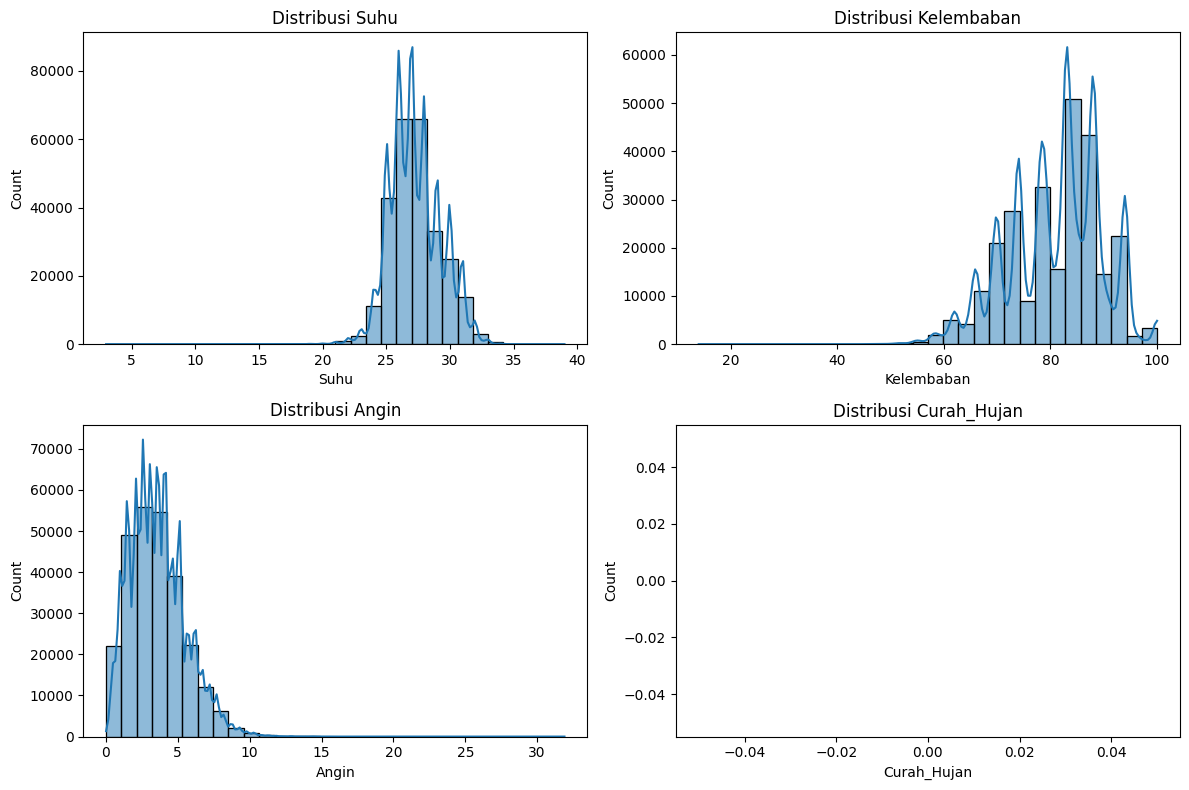

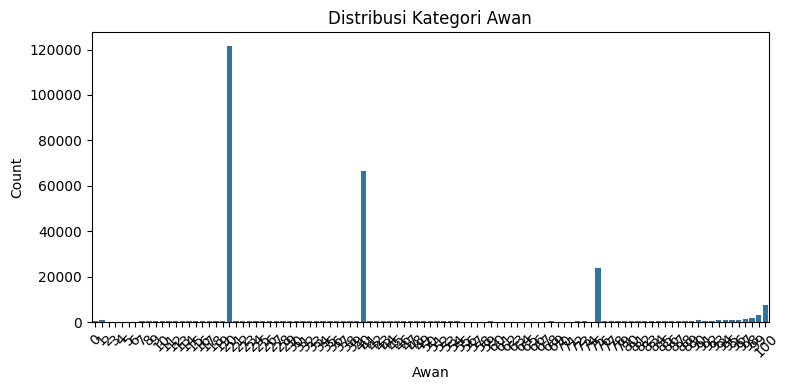


=== Insight Ringkas ===


,Aspek,Insight
0,Missing Values,Curah_Hujan memiliki missing terbesar; kolom l...
1,Distribusi Suhu,Suhu stabil (umumnya di rentang menengah) -> i...
2,Distribusi Kelembaban,Kelembaban tinggi (mayoritas >70%) sesuai ikli...
3,Distribusi Angin,"Kecepatan angin rendah–sedang, mayoritas tidak..."
4,Distribusi Curah Hujan,"Distribusi curah hujan tidak merata, banyak no..."
5,Distribusi Awan,"Kategori Awan beberapa kelas dominan, potensi ..."



=== Rekomendasi Awal ===


,Rekomendasi
0,Imputasi/penanganan Curah_Hujan (banyak missing).
1,Standarisasi/normalisasi opsional untuk model ...
2,Pertimbangkan re-labeling/bucketing Awan untuk...
3,Gunakan sampling/weighting bila klasifikasi Aw...
4,Hindari menyimpan file berat (model) jika stor...


In [ ]:
# ---------- Import library ----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- Konfigurasi ----------
N_ROWS = None         # batasi load untuk testing, None = semua baris
DATA_PATH = "../data/cuaca_clean.csv"
RANDOM_STATE = 42

# ---------- Load data ----------
df = pd.read_csv(DATA_PATH, nrows=N_ROWS)
required_cols = ['Tanggal','Suhu','Curah_Hujan','Kelembaban','Angin','Awan']
assert set(required_cols).issubset(df.columns), \
    f"Kolom wajib tidak lengkap. Pastikan: {required_cols}"

# ---------- Parsing tipe data ----------
df['Tanggal'] = pd.to_datetime(df['Tanggal'], errors='coerce')

# Pastikan kolom numerik
for col in ['Suhu','Kelembaban','Curah_Hujan','Angin']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# ---------- Ringkasan awal ----------
print("=== 5 Baris Pertama ===")
display(df.head())

print("\n=== Statistik Dasar (Numerik) ===")
display(df[['Suhu','Kelembaban','Curah_Hujan','Angin']].describe().T)

print("\n=== Statistik Dasar (Kategorikal) ===")
awan_counts = df['Awan'].value_counts(dropna=False).to_frame('count')
awan_counts['prop'] = (awan_counts['count'] / len(df)).round(3)
display(awan_counts)

print("\n=== Missing Values ===")
missing_tbl = df.isnull().sum().to_frame('Missing_Count')
missing_tbl['Missing_%'] = (missing_tbl['Missing_Count']/len(df)*100).round(2)
display(missing_tbl)

# ---------- Visualisasi numerik ----------
kolom_numeric = ['Suhu','Kelembaban','Angin','Curah_Hujan']
n = len(kolom_numeric)
cols = 2
rows = int(np.ceil(n/cols))
fig, axes = plt.subplots(rows, cols, figsize=(12, rows*4))
axes = axes.flatten()

for i, k in enumerate(kolom_numeric):
    sns.histplot(df[k].dropna(), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribusi {k}')
    axes[i].set_xlabel(k)
    axes[i].set_ylabel('Count')

# hapus axes kosong jika ada
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# ---------- Visualisasi kategorikal ----------
plt.figure(figsize=(8,4))
sns.countplot(x='Awan', data=df)
plt.title("Distribusi Kategori Awan")
plt.xlabel("Awan")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------- Insight ringkas dalam tabel ----------
insight_summary = pd.DataFrame({
    "Aspek": [
        "Missing Values",
        "Distribusi Suhu",
        "Distribusi Kelembaban",
        "Distribusi Angin",
        "Distribusi Curah Hujan",
        "Distribusi Awan"
    ],
    "Insight": [
        "Curah_Hujan memiliki missing terbesar; kolom lain relatif lengkap.",
        "Suhu stabil (umumnya di rentang menengah) -> iklim cenderung konstan.",
        "Kelembaban tinggi (mayoritas >70%) sesuai iklim tropis lembap.",
        "Kecepatan angin rendah–sedang, mayoritas tidak ekstrem.",
        "Distribusi curah hujan tidak merata, banyak nol dan missing.",
        "Kategori Awan beberapa kelas dominan, potensi imbalance."
    ],
})
print("\n=== Insight Ringkas ===")
display(insight_summary)

# ---------- Rekomendasi EDA ----------
rekomendasi = pd.DataFrame({
    "Rekomendasi": [
        "Imputasi/penanganan Curah_Hujan (banyak missing).",
        "Standarisasi/normalisasi opsional untuk model linier.",
        "Pertimbangkan re-labeling/bucketing Awan untuk klasifikasi (kurangi kelas langka).",
        "Gunakan sampling/weighting bila klasifikasi Awan imbalance.",
        "Hindari menyimpan file berat (model) jika storage terbatas."
    ]
})
print("\n=== Rekomendasi Awal ===")
display(rekomendasi)
